<a href="https://colab.research.google.com/github/KTH-EXPECA/summer-school-2025/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Install and Load Data

In this section, we will:  
1. **Install dependencies**  
2. **Download the dataset**  
3. **Import required Python packages**

In [1]:
# Install dependencies
!pip install scipy
!pip install git+https://github.com/samiemostafavi/pr3d.git@develop

In [1]:
# Download datasets from Github
!mkdir -p /content/data
!curl -L -o /content/data/dataset.zip "https://github.com/KTH-EXPECA/summer-school-2025/raw/refs/heads/main/dataset.zip"
!unzip -q -o /content/data/dataset.zip
!rm -rf /content/data
!rm -rf /content/__MACOSX

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20.5M  100 20.5M    0     0  16.6M      0  0:00:01  0:00:01 --:--:-- 16.6M


In [2]:
# Import required packages
import pickle, json
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Open the datasets and inspect their contents

We first load the dataset file (`dataset.pkl`) which contains several experiments.  
For each experiment, we will:  

- Show the **metadata** describing the experiment setup.  
- Display the **dataframe shape** (rows × columns) and its available columns.  
- Filter the records where `segment == -1` (indicates only packet records).  
- Compute basic **statistics**:
  - Packet length  
  - Average and standard deviation of MCS index  
  - Average number of HARQ retransmissions  
  - Average number of RLC retransmissions
  - Average latency of the Packet

💡 **Note:** The metadata field `arrivals_num` indicates the **number of packet arrivals** in each experiment.

This gives a quick overview of what is inside each dataset before we dive deeper.

👉 **Question to think about:**  
Can you find relationships between the **average packet delay** and the other properties (MCS, retransmissions, packet length) in each experiment?

In [3]:
pkl_path = Path("/content/dataset.pkl")
with open(pkl_path, "rb") as f:
    datasets = pickle.load(f)

datasets_dict = {}
for i, item in enumerate(datasets, 1):
    df = pd.DataFrame(item.get("dataset"))
    meta = {k: v for k, v in item.items() if k not in ["dataset", "db_id"]}

    # filter
    packets_df = df[df["segment"] == -1].copy()
    packets_df['packet_delay_ms'] = (
        packets_df['depart_timestamp'].astype(float) - packets_df['timestamp'].astype(float)
    ) * 1000

    # compute stats
    stats = {
        "Mean Packet Length": np.mean(packets_df["len"]),
        "Mean MCS Index": np.mean(packets_df["mcs_index"]),
        "Std MCS Index": np.std(packets_df["mcs_index"]),
        "Mean HARQ Retx.": np.mean(packets_df["mretx"]),
        "Mean RLC Retx.": np.mean(packets_df["rfailed"]),
        "Mean Latency": np.mean(packets_df["packet_delay_ms"]),
    }

    # pretty print
    print(f"\n{'='*25} DATASET {i} {'='*25}")
    print("Meta information:")
    display(pd.DataFrame([meta]))   # nicely formatted as a table
    print("\nStatistics:")
    display(pd.DataFrame([stats]))
    print(f"\nDataFrame shape: {df.shape}, columns: {list(df.columns)}")

    datasets_dict[item['dataset_name']] = packets_df

datasets = datasets_dict


========================= DATASET 1 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e20,77e2,90306,18061



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,127.940701,23.919274,1.643363,0.487625,1.13089,47.819503



DataFrame shape: (90306, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 2 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e4,a431,146421,36602



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,227.88946,20.0,0.0,0.000109,0.00112,18.853617



DataFrame shape: (146421, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 3 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e19,37ff,89016,18058



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,127.940691,22.675767,1.490224,0.568668,1.043803,43.780747



DataFrame shape: (89016, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 4 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e6,71f5,146155,36532



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,1027.38558,20.0,0.0,0.003668,0.00063,19.210568



DataFrame shape: (146155, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 5 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e8,2779,256363,73053



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,1023.674127,19.563276,0.590081,0.209095,0.001122,21.4974



DataFrame shape: (256363, 13), columns: ['segment', 'packet_id', 'depart_timestamp', 'timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 6 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e7,e595,252737,72214



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,773.760019,20.0,0.0,0.082366,0.000291,20.585431



DataFrame shape: (252737, 13), columns: ['segment', 'packet_id', 'depart_timestamp', 'timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']


### Step 3: Exploring Packet Delay Reliability

We now have experiments labeled **e4, e6, e7, e8, e19, and e20**, with all packet dataframes stored inside the `datasets` dictionary.  

Our next goal is to **analyze packet delays more deeply** by looking at the frequency of outliers (delay spikes) in a **probabilistic way**. This type of analysis helps us understand the **reliability of a 5G link** for time-critical applications.  

Specifically, we will:  
- Plot the **time series** of packet delays  
- Compute and visualize the **empirical PDF**  
- Plot the **log(CCDF)** (tail probability)  

---

💡 **Task:**  
Extended Reality (XR) applications require packet delays below **50 ms** with probability **0.999**.  

1. Write a function that:  
   - Takes a dataframe of packet delays  
   - Checks if the requirement is satisfied  
   - Returns `True` if the service-level requirement is met, otherwise `False`  

2. Run this function on each experiment (`e4, e6, e7, e8, e19, e20`) and compare the results.  

This will tell us which 5G experiment setups are reliable enough for XR applications.

In [5]:
# function definintions

def plot_time_series_plot(df):

    df['packet_delay_ms'] = (df['depart_timestamp'].astype(float) - df['timestamp'].astype(float)) * 1000
    packet_delays_ms = df['packet_delay_ms'].tolist()

    plt.figure(figsize=(6, 3))
    plt.plot(df['packet_delay_ms'].values)
    plt.xlabel('Time')
    plt.ylabel('Packet delay (ms)')
    plt.title('Packet delay over time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_pdf_plot(df):

    # Use the same delays column you computed
    delays = pd.to_numeric(df['packet_delay_ms'], errors='coerce').dropna().to_numpy()

    # Keep only [0, 400] ms for the plot domain
    mask = (delays >= 0) & (delays <= 400)
    delays_clip = delays[mask]

    # Histogram as PDF (area = 1). 2 ms bins across 0–400 ms -> 200 bins
    bins = np.linspace(0, 400, 201)
    pdf_vals, bin_edges = np.histogram(delays_clip, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.figure(figsize=(5, 3))
    plt.plot(bin_centers, pdf_vals)
    #plt.xlim(0, 400)
    plt.xlabel('Packet delay (ms)')
    plt.ylabel('PDF')
    plt.title('Packet Delay Empirical PDF')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_ccdf_log(df):

    # calculate CCDF
    delays = pd.to_numeric(df['packet_delay_ms'], errors='coerce').dropna().to_numpy()
    delays.sort()                              # ascending
    n = delays.size
    ccdf = 1.0 - (np.arange(1, n + 1) / n)     # empirical CCDF = 1 - ECDF

    # plot CCDF
    plt.figure(figsize=(5, 3))
    plt.step(delays, ccdf, where='post')       # survival curve style
    plt.yscale('log')
    #plt.xlim(0, 400)
    plt.ylim(1e-5, 1)
    plt.xlabel('Packet delay (ms)')
    plt.ylabel('CCDF  (P[Delay > x])')
    plt.title('Packet Delay Empirical CCDF')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

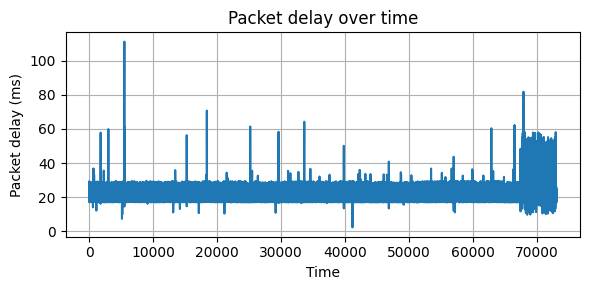

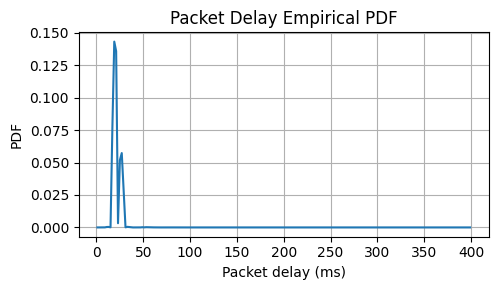

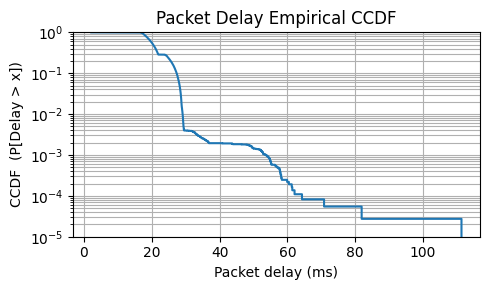

In [6]:
# Plot timeseries and probabilities for experiment 'e8'

e8_df = pd.DataFrame(datasets['e8'])
plot_time_series_plot(e8_df)
plot_pdf_plot(e8_df)
plot_ccdf_log(e8_df)

In [2]:
!pip uninstall -y pr3d
!pip install git+https://github.com/samiemostafavi/pr3d.git@develop

Found existing installation: pr3d 0.0.1
Uninstalling pr3d-0.0.1:
  Successfully uninstalled pr3d-0.0.1
  Cloning https://github.com/samiemostafavi/pr3d.git (to revision develop) to /tmp/pip-req-build-8ghdn725
  Running command git clone --filter=blob:none --quiet https://github.com/samiemostafavi/pr3d.git /tmp/pip-req-build-8ghdn725
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/samiemostafavi/pr3d.git to commit ff9e8c8d7f5e3886940f532ea5d4f443e0d11c04
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pr3d: filename=pr3d-0.0.1-py3-none-any.whl size=39581 sha256=16bb681f46c80213741d51ca487288f5fa27ec24b1cedb8fcfccb4e49f534d82
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7n8q466/wheels/2e/f1/46/c7fb0202d4cdd4342fc69e7b7361

### Step 4: Train a Single-Layer Perceptron for Latency Distribution

Now we will train a **single-layer perceptron (SLP)** to model the latency distribution.
As you observed, the latency distribution is **not unimodal** (i.e., not a simple Gaussian).  
To capture its multi-modal nature, we use a **mixture model** and optimize it with **negative log-likelihood (NLL)**.

#### What we do in this step

- **Extract delays** from each dataset and (optionally) **standardize** them  
  \- We compute `y_mean` and `y_std` and transform `Y → (Y - y_mean)/y_std`.  
  \- We keep (`y_mean`, `y_std`) to map model outputs back to milliseconds later.

- **Build a non-conditional model** (SLP) that outputs the parameters of a **K-component Gaussian Mixture (GMM)**:  
  \- **mixture_weights**, **mixture_locations** (means), **mixture_scales** (stds).  
  \- Because it’s non-conditional, the input is just a **dummy vector of zeros** (placeholder).

- **Subsample** a manageable number of points (`num_samples`) for quick training, then split into  
  **train/validation** sets (e.g., 80/20) to monitor generalization.

- **Train with NLL loss** using mini-batches (`batch_size`) for `num_epochs` with Adam (`learning_rate`).  
  \- **Lower loss / val_loss** indicates a better fit to the observed delay distribution.

In [31]:
from pr3d.de import GaussianMM, GaussianMixtureEVM, GammaMixtureEVM
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# training function
def train_slp_gmm_model(
    num_centers,
    df,
    num_samples,
    batch_size,
    num_epochs,
    learning_rate,
    standardize,
    val_fraction=0.2,   # fraction of samples for validation
):

    model = GaussianMM(centers=num_centers)

    # --- Prepare data ---
    delays = pd.to_numeric(df['packet_delay_ms'], errors='coerce').dropna().to_numpy()
    Y = np.asarray(delays, dtype=np.float64).reshape(-1, 1)

    if standardize:
        y_mean = float(Y.mean())
        y_std  = float(Y.std() + 1e-8)   # avoid divide-by-zero
    else:
        y_mean = 0.0
        y_std  = 1.0

    Yz = (Y - y_mean) / y_std

    # Ensure shapes are (N,1)
    Xz = np.zeros((len(Yz), 1))
    Yz = np.asarray(Yz).reshape(-1, 1)

    # pick a subset of training samples
    idx = np.random.choice(len(Yz), size=num_samples, replace=False)
    X_sub = Xz[idx]
    Y_sub = Yz[idx]

    # --- Train/validation split ---
    X_train, X_val, Y_train, Y_val = train_test_split(
        X_sub, Y_sub, test_size=val_fraction, random_state=42
    )

    # --- Training rounds ---
    training_rounds = [{"learning_rate": learning_rate, "epochs": num_epochs}]

    for i, rp in enumerate(training_rounds, 1):
        print(f"Training session {i}/{len(training_rounds)} with {rp}")

        model.training_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=rp["learning_rate"]),
            loss=model.loss,
        )

        history = model.training_model.fit(
            x=[X_train, Y_train],
            y=Y_train,
            batch_size=batch_size,
            epochs=rp["epochs"],
            verbose=1,
            shuffle=True,
            validation_data=([X_val, Y_val], Y_val),
        )

    return model, y_mean, y_std, history


def plot_ccdf_pdf_with_model(
    df,
    model,
    max_x: float = 400.0,
    num_points: int = 1200,
    batch_size: int = 2048,
    y_mean: float | None = None,
    y_std: float | None = None,
    pdf_bins: int = 400,
    use_kde: bool = False,
):
    """
    delays_ms : 1D array of delays (ms)
    model     : your GaussianMM instance (with .prob_pred_model)
    y_mean,y_std : if you trained on standardized targets, pass them here
    """

    # ----- Clean & sort data -----
    delays = pd.to_numeric(df['packet_delay_ms'], errors='coerce').dropna().to_numpy()
    delays = delays[(delays >= 0) & (delays <= max_x)]
    delays.sort()
    n = delays.size
    if n == 0:
        raise ValueError("No valid delay samples in range.")

    # ----- Empirical CCDF -----
    emp_ccdf = 1.0 - (np.arange(1, n + 1) / n)

    # ----- Grid for model curves -----
    grid_y = np.linspace(0.0, max_x, num_points)

    # If trained on z, feed z into the model
    if (y_mean is not None) and (y_std is not None):
        z = (grid_y - y_mean) / (y_std + 1e-12)
        jac = 1.0 / (y_std + 1e-12)  # for PDF only
    else:
        z = grid_y
        jac = 1.0

    # dtype & shapes for model inputs
    try:
        dtype_np = getattr(model, "dtype").as_numpy_dtype
    except Exception:
        dtype_np = np.float64

    X_dummy = np.zeros_like(z, dtype=dtype_np).reshape(-1, 1)
    Y_in    = np.asarray(z, dtype=dtype_np).reshape(-1, 1)

    # Predict model pdf/logpdf/ecdf
    pdf_m, logpdf_m, ecdf_m = model.prob_pred_model.predict(
        [X_dummy, Y_in], batch_size=batch_size, verbose=0
    )
    pdf_m   = np.squeeze(pdf_m)   * jac         # scale pdf if standardized
    ccdf_m  = 1.0 - np.squeeze(ecdf_m)         # ccdf unaffected by affine scale

    # ----- Empirical PDF (KDE or histogram density) -----
    # Try KDE for smooth curve; fallback to histogram
    emp_x_pdf = None
    emp_pdf   = None
    if use_kde:
        try:
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(delays)
            emp_x_pdf = grid_y
            emp_pdf   = kde(emp_x_pdf)
        except Exception:
            pass

    if emp_pdf is None:
        # Histogram density estimate
        counts, edges = np.histogram(delays, bins=pdf_bins, range=(0, max_x), density=True)
        emp_x_pdf = 0.5 * (edges[:-1] + edges[1:])
        emp_pdf   = counts

    # ===================== PLOTS =====================

    # CCDF
    plt.figure(figsize=(5, 3))
    plt.step(delays, emp_ccdf, where='post', label='Empirical CCDF')
    plt.plot(grid_y, ccdf_m, label='Predicted CCDF')
    plt.yscale('log')
    plt.xlim(0, max_x)
    plt.ylim(1e-5, 1)
    plt.xlabel('Packet delay (ms)')
    plt.ylabel('CCDF  (P[Delay > x])')
    plt.title('Packet Delay CCDF: Data vs Model')
    plt.grid(True, which='both')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # PDF
    plt.figure(figsize=(5, 3))
    # empirical (step if hist; line if KDE)
    if len(emp_x_pdf) == len(grid_y):
        plt.plot(emp_x_pdf, emp_pdf, label='Empirical PDF')
    else:
        plt.step(emp_x_pdf, emp_pdf, where='mid', label='Empirical PDF')
    # model
    plt.plot(grid_y, pdf_m, label='Predicted PDF')
    plt.xlim(0, max_x)
    plt.xlabel('Packet delay (ms)')
    plt.ylabel('PDF')
    plt.title('Packet Delay PDF: Data vs Model')
    plt.grid(True, which='both')
    plt.legend()
    plt.tight_layout()
    plt.show()



⬇️ **Run the code cell below to train**  

In [29]:
# Train a single layer perceptron GMM model
model, y_mean, y_std, history = train_slp_gmm_model(
    num_centers = 8,
    df = datasets['e20'],
    num_samples = 200,
    batch_size = 32,
    num_epochs = 100,
    learning_rate = 0.001,
    standardize = True,
    val_fraction=0.2
)

Training session 1/1 with {'learning_rate': 0.001, 'epochs': 100}
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 1.2344 - val_loss: 1.1895
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1966 - val_loss: 1.1819
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1877 - val_loss: 1.1744
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1690 - val_loss: 1.1673
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1866 - val_loss: 1.1601
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1428 - val_loss: 1.1529
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1426 - val_loss: 1.1458
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1658 - val_loss: 1.1390
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1906 - val_loss: 1.1319
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2056 - val_loss: 1.1249
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1848 - val_loss: 1.1179
Epoch 12

Next, **plot the results** to evaluate how well the model captures the data:

- Empirical **PDF**
- **log(CCDF)** (tail probability), which is what we use to assess reliability

⬇️ **Run the plotting code cell**

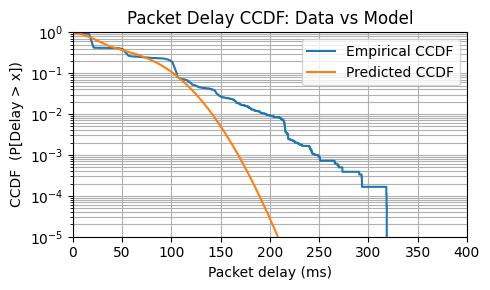

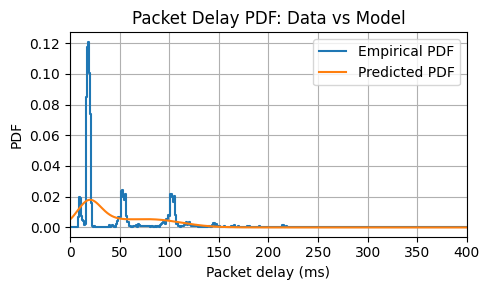

In [32]:
# plot the model prediction
plot_ccdf_pdf_with_model(datasets['e20'], model, 400, y_mean=y_mean, y_std=y_std)

Now investigate **how the number of training samples** affects accuracy for high reliability services.
As you **decrease** the number of training samples, model uncertainty typically **increases**, and the tail fit may become inaccurate.

**What to do:**
1. Train multiple models with different `num_samples` (e.g., **100**, **200**, **2,000**).
2. For each model compare the fitted mixture to the **empirical** estimate from data.
3. Identify which experiments and which quantiles the model struggles to predict accurately.


In [6]:
!pip uninstall -y pr3d
!pip install git+https://github.com/samiemostafavi/pr3d.git@develop

Found existing installation: pr3d 0.0.1
Uninstalling pr3d-0.0.1:
  Successfully uninstalled pr3d-0.0.1
  Cloning https://github.com/samiemostafavi/pr3d.git (to revision develop) to /tmp/pip-req-build-yfpzwh47
  Running command git clone --filter=blob:none --quiet https://github.com/samiemostafavi/pr3d.git /tmp/pip-req-build-yfpzwh47
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/samiemostafavi/pr3d.git to commit 2c5806818347ea7e18e96deefb4f23650aa9d7f9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pr3d: filename=pr3d-0.0.1-py3-none-any.whl size=39833 sha256=2eeb7815bb7e1639cb075c6f1422c0a1847887a2b6dada804b50ce60c8ef8146
  Stored in directory: /tmp/pip-ephem-wheel-cache-atmni6s8/wheels/2e/f1/46/c7fb0202d4cdd4342fc69e7b7361

In [4]:
from pr3d.de import GaussianMM, GaussianMixtureEVM, GammaMixtureEVM, AppendixEVM
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# training function
def train_slp_evm_model(
    centers,
    df,
    num_samples,
    batch_size,
    bulk_num_epochs,
    bulk_learning_rate,
    evm_num_epochs,
    evm_learning_rate,
    standardize,
    val_fraction=0.2,   # fraction of samples for validation
):

    # --- Prepare data ---
    delays = pd.to_numeric(df['packet_delay_ms'], errors='coerce').dropna().to_numpy()
    Y = np.asarray(delays, dtype=np.float64).reshape(-1, 1)

    if standardize:
        y_mean = float(Y.mean())
        y_std  = float(Y.std() + 1e-8)   # avoid divide-by-zero
    else:
        y_mean = 0.0
        y_std  = 1.0

    Yz = (Y - y_mean) / y_std

    # Ensure shapes are (N,1)
    Xz = np.zeros((len(Yz), 1))
    Yz = np.asarray(Yz).reshape(-1, 1)

    # pick a subset of training samples
    idx = np.random.choice(len(Yz), size=num_samples, replace=False)
    X_sub = Xz[idx]
    Y_sub = Yz[idx]

    # --- Train/validation split ---
    X_train, X_val, Y_train, Y_val = train_test_split(
        X_sub, Y_sub, test_size=val_fraction, random_state=42
    )


    # --- 1) Bulk Training rounds ---
    training_rounds = [{"learning_rate": bulk_learning_rate, "epochs": bulk_num_epochs}]

    bulk_model = GaussianMM(centers=centers)

    for i, rp in enumerate(training_rounds, 1):
        print(f"Training session {i}/{len(training_rounds)} with {rp}")

        bulk_model.training_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=rp["learning_rate"]),
            loss=bulk_model.loss,
        )

        history = bulk_model.training_model.fit(
            x=[X_train, Y_train],
            y=Y_train,
            batch_size=batch_size,
            epochs=rp["epochs"],
            verbose=1,
            shuffle=True,
            validation_data=([X_val, Y_val], Y_val),
        )

    # --- 2) EVM Training rounds ---
    training_rounds = [{"learning_rate": evm_learning_rate, "epochs": evm_num_epochs}]

    evm_model = AppendixEVM(
        bulk_params=bulk_model.get_parameters(),
        tanh_lo=-0.5,
        tanh_hi=0.6,
        param_threshold=0.99,
    )

    X_train = np.asarray(X_train, dtype=np.float64).reshape(-1, 1)
    Y_train = np.asarray(Y_train, dtype=np.float64).reshape(-1, 1)


    training_rounds = [
        {"learning_rate": evm_learning_rate, "epochs": evm_num_epochs},
    ]

    for i, rp in enumerate(training_rounds, 1):
        print(f"Training session {i}/{len(training_rounds)} with {rp}")

        # Compile & fit
        evm_model.training_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss=evm_model.loss,
            run_eagerly=True,   # optional for clearer traces; turn off later
        )

        feed = {
            evm_model.training_model.inputs[0].name: X_train,
            evm_model.training_model.inputs[1].name: Y_train,
        }
        evm_model.training_model.fit(
            x=feed,
            y=Y_train,
            batch_size=batch_size,
            epochs=rp["epochs"],
            verbose=1,
            shuffle=True,
            validation_data=([X_val, Y_val], Y_val),
        )

    return (evm_model, bulk_model, y_mean, y_std, history)

evm_model, bulk_model, y_mean, y_std, evm_history = train_slp_evm_model(
    centers = 8,
    df = datasets['e20'],
    num_samples = 300,
    batch_size = 32,
    bulk_num_epochs = 100,
    bulk_learning_rate = 0.001,
    evm_num_epochs = 64,
    evm_learning_rate = 0.001,
    standardize = True
)

Training session 1/1 with {'learning_rate': 0.001, 'epochs': 10}
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 1.4529 - val_loss: 1.2739
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.5043 - val_loss: 1.2666
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3806 - val_loss: 1.2596
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3205 - val_loss: 1.2526
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4554 - val_loss: 1.2455
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3783 - val_loss: 1.2389
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3633 - val_loss: 1.2321
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3045 - val_loss: 1.2255
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3513 - val_loss: 1.2189
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4556 - val_loss: 1.2130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Training session 1/1 with {'learning_rate': 0.001, 'epochs': 64}


KeyboardInterrupt: 

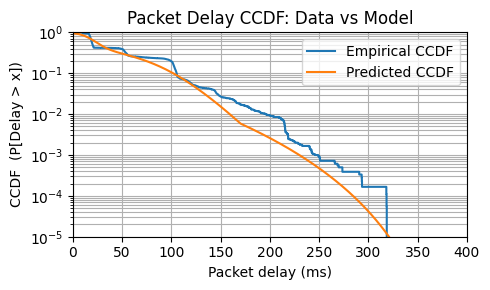

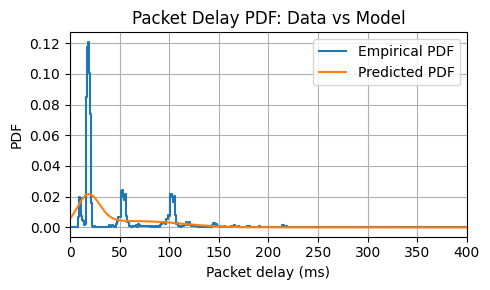

In [59]:
# plot the model prediction
plot_ccdf_pdf_with_model(datasets['e20'], evm_model, 400, y_mean=y_mean, y_std=y_std)

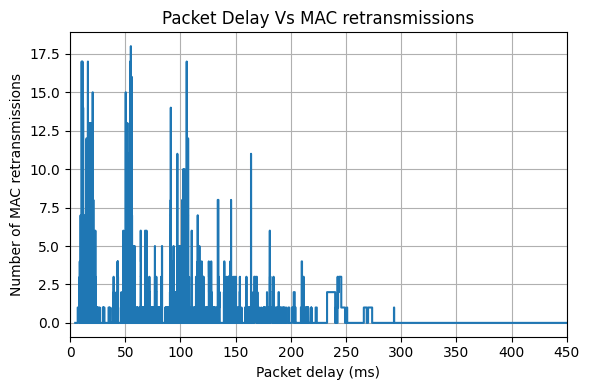

In [ ]:
# Get the no of mac retransmissions
mretx = df['mretx'].tolist()

# plot delay distribution over the number of mac retransmissions
plt.figure(figsize=(6, 4))
plt.step(delays, mretx, where='post')       # survival curve style
plt.xlim(0, 450)
plt.xlabel('Packet delay (ms)')
plt.ylabel('Number of MAC retransmissions')
plt.title('Packet Delay Vs MAC retransmissions')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

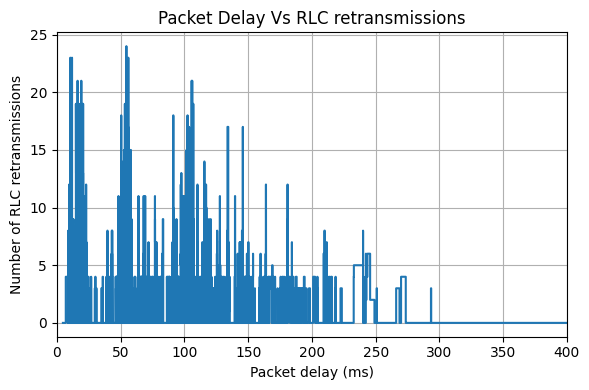

In [ ]:
# Get the no of rlc retransmissions
rlcRetx = df['rfailed'].tolist()

# plot delay distribution over the number of rlc retransmissions
plt.figure(figsize=(6, 4))
plt.step(delays, rlcRetx, where='post')       # survival curve style
plt.xlim(0, 400)
plt.xlabel('Packet delay (ms)')
plt.ylabel('Number of RLC retransmissions')
plt.title('Packet Delay Vs RLC retransmissions')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

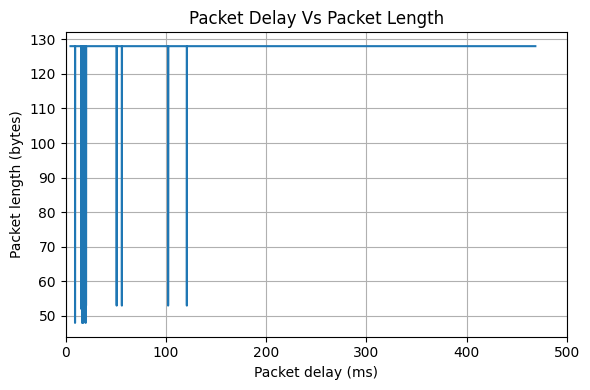

In [ ]:
# Get the packet length
pktLen = df['len'].tolist()

# plot delay distribution over the packet length
plt.figure(figsize=(6, 4))
plt.step(delays, pktLen, where='post')       # survival curve style
plt.xlim(0, 500)
plt.xlabel('Packet delay (ms)')
plt.ylabel('Packet length (bytes)')
plt.title('Packet Delay Vs Packet Length')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()